In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

* So from the above cell we can get the feature name and species as well and put into a pandas dataset

In [4]:
df1 = pd.DataFrame(data.data,columns = ["sepal length","Sepal width","petal length","petal width"])

In [5]:
df1.head()

sepal length  Sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [6]:
## Lets make target column{Type}
target = pd.DataFrame(data.target, columns = ["type"])

In [7]:
## Now moving to the final DF
df = pd.concat([df1,target],axis=1)

In [8]:
df.head()

sepal length  Sepal width  petal length  petal width  type
0           5.1          3.5           1.4          0.2     0
1           4.9          3.0           1.4          0.2     0
2           4.7          3.2           1.3          0.2     0
3           4.6          3.1           1.5          0.2     0
4           5.0          3.6           1.4          0.2     0

In [9]:
def labelling(val, *boundaries):
    if (val < boundaries[0]):
        return 1
    elif (val < boundaries[1]):
        return 2
    elif (val < boundaries[2]):
        return 3
    else:
        return 4


In [10]:
def TransformationOflabel(df, feature_name):
    arg2 = df[feature_name].mean()
    min1 = df[feature_name].min()
    arg1 = (min1 + arg2)/2
    max1 = df[feature_name].max()
    arg3 = (max1 + arg2)/2
    return df[feature_name].apply(labelling, args= (arg1, arg2, arg3))

In [11]:
df['new_sepal_lenght'] =  TransformationOflabel(df, "sepal length")
df["new_sepal_width"]  =  TransformationOflabel(df, "Sepal width")
df['new_petal_lenth']  =  TransformationOflabel(df, "petal length")
df['new_petal_width']  =  TransformationOflabel(df, 'petal width')


In [12]:
df.head()

sepal length  Sepal width  petal length  petal width  type  \
0           5.1          3.5           1.4          0.2     0   
1           4.9          3.0           1.4          0.2     0   
2           4.7          3.2           1.3          0.2     0   
3           4.6          3.1           1.5          0.2     0   
4           5.0          3.6           1.4          0.2     0   

   new_sepal_lenght  new_sepal_width  new_petal_lenth  new_petal_width  
0                 2                3                1                1  
1                 1                2                1                1  
2                 1                3                1                1  
3                 1                3                1                1  
4                 1                3                1                1

In [13]:
df.drop(["sepal length","Sepal width","petal length","petal width"], axis=1,inplace =True)

In [14]:
df.head()

type  new_sepal_lenght  new_sepal_width  new_petal_lenth  new_petal_width
0     0                 2                3                1                1
1     0                 1                2                1                1
2     0                 1                3                1                1
3     0                 1                3                1                1
4     0                 1                3                1                1

In [15]:
df_y = df["type"]

In [16]:
df = df.drop("type",axis=1)

In [17]:
df.head()

new_sepal_lenght  new_sepal_width  new_petal_lenth  new_petal_width
0                 2                3                1                1
1                 1                2                1                1
2                 1                3                1                1
3                 1                3                1                1
4                 1                3                1                1

In [18]:
df = pd.concat([df,df_y],axis=1)

In [19]:
df.head()

new_sepal_lenght  new_sepal_width  new_petal_lenth  new_petal_width  type
0                 2                3                1                1     0
1                 1                2                1                1     0
2                 1                3                1                1     0
3                 1                3                1                1     0
4                 1                3                1                1     0

In [20]:
def entropy(target):
    num_of_classes, counts = np.unique(target, return_counts = True)
    num_of_classes = len(num_of_classes)
    entropy = np.sum([((-counts[i]/np.sum(counts))*np.log(counts[i]/np.sum(counts))) for i in range(num_of_classes)])
    print(f"The entropy is : {entropy}")
    return entropy

### Now will be calculating Information Gain
* The formula for ` Previous node entropy- weighted sum of entropy `

In [21]:
def info_gain(data, split_attribute_name, target_name='type'):
    
    total_entropy  = entropy(data[target_name])
    vals,counts = np.unique(data[split_attribute_name],return_counts = True)
#     Here we will be calculating the total entropy

    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i])
                                                                  .dropna()[target_name])for i in range(len(vals))])

#     Here we are calculating the information_gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [22]:
def Decision_Tree(data,originaldata,features,target_attribute_name="type",parent_node=None ):
    # if a node is pure then return the the class
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0] 
    ## If the DataSet isEmpty then we will return
    elif len(data) == 0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],
                                                                           return_counts=True)[1])]
    
    ## if there are no more feature to work upon then return the maximum number as result
    elif len(features) == 0:
        return parent_node 
    ## if all the above mentioned condition doesn't hold then we will build the tree
    else:
        parent_node = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],
                                                                           return_counts=True)[1])]
        ## Selecting the feature for which We will have maximum gain ratio
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],
                                                                           return_counts=True)[1])]
        
    #Select the feature which best splits the dataset
    
    item_values = [info_gain(data,feature,target_attribute_name)for feature in features] ## Giving the information gain
    print("Information_gain:",np.max(item_values))
    best_feature_index = np.argmax(item_values)
    best_feature = features[best_feature_index]

    #Remve the feature with the best information  gain
    features = [i for i in features if i!= best_feature]
    
    #Create the tree structure
    tree = {best_feature:{}}


    #Grow the tree branch under the root node

    for value in np.unique(data[best_feature]):
        value = value
        sub_data = data.where(data[best_feature]==value).dropna()
        #call the ID3 algotirthm
        subtree = Decision_Tree(sub_data,df,features,target_attribute_name,parent_node_class)
        #Add the subtree
        tree[best_feature][value] = subtree
    return(tree)

In [23]:
tree = Decision_Tree(df,df,df.columns[:-1])
tree

The entropy is : 1.0986122886681096
The entropy is : 0.4470620543337879
The entropy is : 0.9548448707361131
The entropy is : 0.6886905739680003
The entropy is : 0.362210557135449
The entropy is : 1.0986122886681096
The entropy is : 0.7659373365785205
The entropy is : 0.9624037646424741
The entropy is : 0.9498816536040511
The entropy is : 0.45056120886630463
The entropy is : 1.0986122886681096
The entropy is : 0.0
The entropy is : 0.0
The entropy is : 0.6249402748692627
The entropy is : 0.0
The entropy is : 1.0986122886681096
The entropy is : 0.0
The entropy is : 0.0
The entropy is : 0.5982695885852573
The entropy is : 0.0
Information_gain: 0.8752583089296135
The entropy is : 0.5982695885852573
The entropy is : 0.0
The entropy is : 0.0
The entropy is : 0.6429124396658009
The entropy is : 0.6730116670092565
The entropy is : 0.5982695885852573
The entropy is : 0.6615632381579821
The entropy is : 0.6016797549132552
The entropy is : 0.5004024235381879
The entropy is : 0.5982695885852573
The

{'new_petal_width': {1: 0.0,
  2: 1.0,
  3: {'new_petal_lenth': {2.0: 1.0,
    3.0: {'new_sepal_lenght': {1.0: 2.0,
      2.0: 1.0,
      3.0: {'new_sepal_width': {1.0: 1.0, 2.0: 1.0, 3.0: 1.0}},
      4.0: 1.0}},
    4.0: 2.0}},
  4: 2.0}}

In [24]:
df.columns

Index(['new_sepal_lenght', 'new_sepal_width', 'new_petal_lenth',
       'new_petal_width', 'type'],
      dtype='object')

In [25]:
def predict(query,tree,default=1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default

            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result
##check the accuracy

def train_test_split(df):
    training_data = df.iloc[:130].reset_index(drop=True)
    testing_data = df.iloc[130:].reset_index(drop=True)
    return training_data,testing_data


def test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient="records")
    predicted = pd.DataFrame(columns=["predicted"])

   #calculation of accuracy

    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0)
        print("The Prediction accuracy is:",(np.sum(predicted["predicted"]==data["y"])/len(data))*100,'%')

In [26]:
df = df.sample(frac=1,ignore_index = True)

In [27]:
train_data,test_data = train_test_split(df)

In [28]:
train_data


new_sepal_lenght  new_sepal_width  new_petal_lenth  new_petal_width  type
0                   2                1                3                2     1
1                   3                3                3                4     2
2                   3                2                3                3     1
3                   2                4                1                1     0
4                   1                3                1                1     0
..                ...              ...              ...              ...   ...
125                 2                2                3                4     2
126                 2                3                1                1     0
127                 2                3                1                1     0
128                 3                2                3                3     1
129                 2                1                3                3     1

[130 rows x 5 columns]

In [29]:
test_data

new_sepal_lenght  new_sepal_width  new_petal_lenth  new_petal_width  type
0                  3                3                4                4     2
1                  4                4                4                4     2
2                  3                2                3                3     1
3                  2                1                3                4     2
4                  2                4                1                1     0
5                  1                3                1                1     0
6                  2                1                3                3     1
7                  2                2                2                3     1
8                  3                2                4                4     2
9                  3                3                3                3     1
10                 1                3                1                1     0
11                 1                1                2                2     1
12                 2                3                1                1     0
13                 4                2                4                3     2
14                 2                4                1                1     0
15                 4                3                3                4     2
16                 3                2                3                3     2
17                 3                3                4                4     2
18                 2                2                3                3     1
19                 1                2                1                1     0

In [30]:
## Now we will be doing the process using Libraray

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
clf = DecisionTreeClassifier(criterion = "entropy" , random_state = 9)

In [33]:
clf.fit(train_data.drop("type",axis = 1), train_data["type"])

DecisionTreeClassifier(criterion='entropy', random_state=9)

In [34]:
clf.score(test_data.drop("type",axis = 1), test_data["type"])

0.95

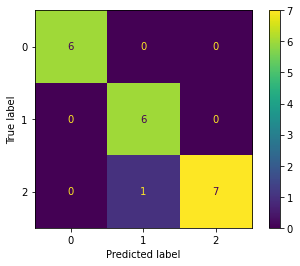

In [35]:
ConfusionMatrixDisplay.from_estimator(clf,test_data.drop("type",axis = 1), test_data["type"]);

In [36]:
from sklearn.tree import export_graphviz

In [38]:
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=data.feature_names,
                          class_names=data.target_names, filled=True, rounded=True)

In [39]:
import pydotplus
from IPython.display import Image 

In [40]:
graph = pydotplus.graph_from_dot_data(dot_data)

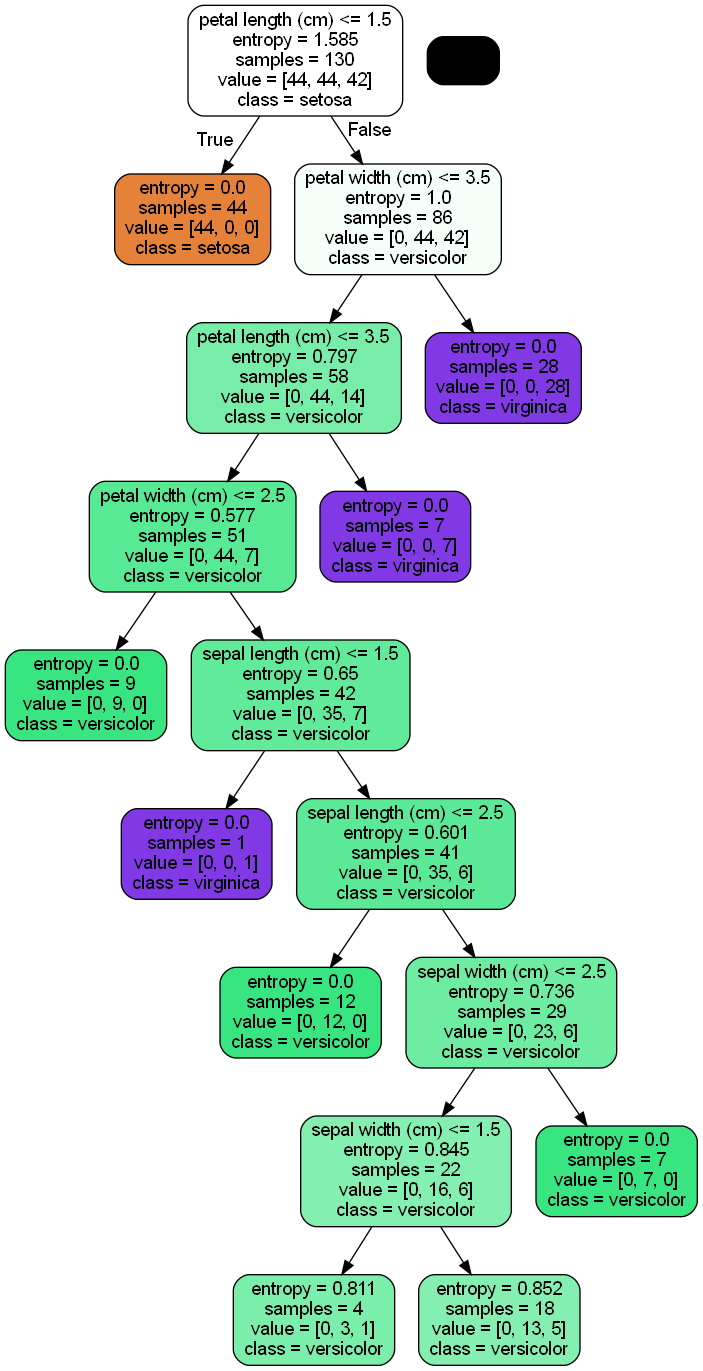

In [41]:
Image(graph.create_png())

### Now we will be doing it for or operator

In [42]:
## Seting the 2 variables
x1 = [0,0,1,1]
x2 = [0,1,0,1]

In [43]:
# X1 variable
df1 = pd.DataFrame(x1,columns = ["X1"]) 

In [44]:
df2 = pd.DataFrame(x2, columns = ["X2"])

In [45]:
df = pd.concat([df1,df2],axis=1)

In [46]:
## Let's make the result column
result = [0,1,1,1]
df3 = pd.DataFrame(result, columns = ["Output"])

In [47]:
df = pd.concat([df,df3],axis=1)

In [48]:
df

X1  X2  Output
0   0   0       0
1   0   1       1
2   1   0       1
3   1   1       1

In [49]:
model =DecisionTreeClassifier()

In [50]:
model.fit(df.drop("Output",axis=1),df["Output"])

DecisionTreeClassifier()

In [51]:
dot_data2 = export_graphviz(model, out_file=None,
                          feature_names=["X1","X2"],
                          class_names=["0","1"], filled=True, rounded=True)

In [52]:
graph2 = pydotplus.graph_from_dot_data(dot_data2)

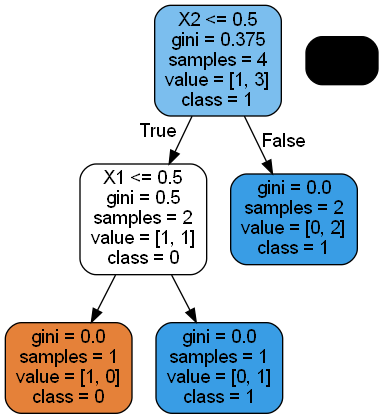

In [53]:
Image(graph2.create_png())